<a href="https://colab.research.google.com/github/Yogeshkumar170201/Image-Classifier/blob/master/FaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Dataset**

In [30]:
!pip install -q kaggle

In [31]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ykdahiya","key":"4b007776f3d4b3608fe320181cfcfa0e"}'}

In [32]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [33]:
!cp kaggle.json ~/.kaggle/

In [34]:
!chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          11642        344  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           2325         63  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           7236        155  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [36]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 319M/330M [00:02<00:00, 159MB/s]
100% 330M/330M [00:02<00:00, 168MB/s]


In [37]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [38]:
!unzip /content/face-mask-12k-images-dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: /content/Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: /content/Face Mask Dataset/Train/Withou

# **Importing Dependencies**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
import os

# **Data Pre-Processing**

In [40]:
train_path = '/content/Face Mask Dataset/Train'
test_path = '/content/Face Mask Dataset/Test'
val_path = '/content/Face Mask Dataset/Validation'

In [41]:
train = tf.keras.utils.image_dataset_from_directory(train_path)
test = tf.keras.utils.image_dataset_from_directory(test_path)
val = tf.keras.utils.image_dataset_from_directory(val_path)
train = train.map(lambda x,y: (x/255, y))
test = test.map(lambda x,y: (x/255, y))
val = val.map(lambda x,y: (x/255, y))

Found 10000 files belonging to 2 classes.
Found 992 files belonging to 2 classes.
Found 800 files belonging to 2 classes.


In [42]:
train_itr = train.as_numpy_iterator()

In [43]:
batch = train_itr.next()
batch[1]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int32)

In [44]:
np.bincount(batch[1])

array([14, 18])

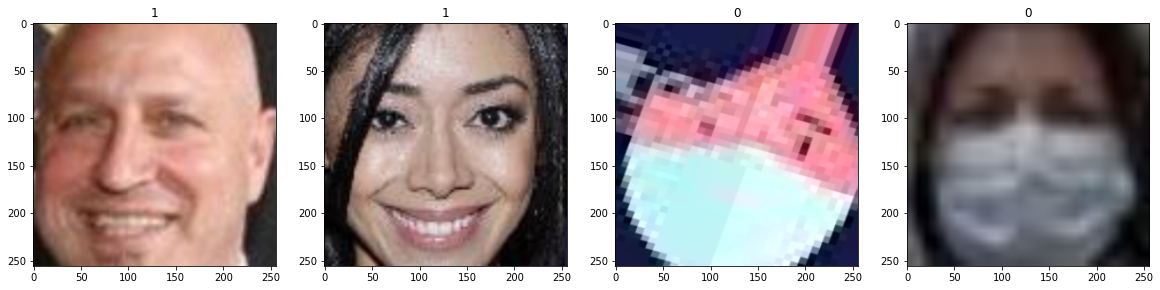

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# **DL Model**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [50]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 16)      

In [52]:
print(len(train), len(val),len(test))
print(len(batch[0]))

313 25 31
32


In [ ]:
history = model.fit(
    train,
    batch_size=64,
    epochs=10,
    validation_data=val
)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9555

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
pree=[]
ree=[]
accc=[]
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    pree.append(pre.result().numpy())
    ree.append(re.result().numpy())
    accc.append(acc.result().numpy())

In [ ]:
plt.scatter(np.arange(0,10), yhat[:10], color='red', marker='+')
plt.scatter(np.arange(0,10), y[:10], color='blue', marker='*')

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(X)-1), pree, color='red') #Precision
ax.plot(np.arange(0, len(X)-1), ree, color='blue') #Recall
ax.plot(np.arange(0, len(X)-1), accc, color='green') #Accuracy

# **Saving Model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','mask_det.h5'))

# **Using Model with webcam**

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
img = cv2.imread('/content/photo.jpg')
fig, ax = plt.subplots(ncols=1, figsize=(10,10))
ax.imshow(img.astype(int))

In [ ]:
cap_img = tf.image.resize(
    img,
    (256, 256),
)
fig = plt.figure()
plt.imshow(cap_img.numpy().astype(int))
plt.show()

In [ ]:
new_model = load_model(os.path.join(os.getcwd(), 'models/face_det.h5'))

In [ ]:
print(np.expand_dims(cap_img/255, 0).shape)
print(batch[0].shape)

In [ ]:
y_hat = new_model.predict(np.expand_dims(cap_img, 0))

In [ ]:
print(y_hat)

In [ ]:
if y_hat > 0.5: 
    print('Face Mask is not there')
else:
    print('Face Mask is there')